## Sensor Placement

In [1]:
import numpy as np
from utils import SensorAgent, SensorPlacementSimulation, random_initial_temp, WaterWualitySimulation

frame = np.full((550, 550, 3), [177, 220, 234], dtype=np.uint8)
frame = random_initial_temp(frame=frame, num_regions=10)

sensor_simulation = [
    [
        SensorAgent('region1', 138, 413, 15, 15, [255, 0, 0]),
        SensorAgent('region2', 138, 138, 15, 15, [0, 255, 0]),
        SensorAgent('region3', 413, 413, 15, 15, [255, 255, 0]),
        SensorAgent('region4', 413, 138, 15, 15, [0, 0, 255]),
    ],
    [
        SensorAgent('region1', 138, 413, 15, 15, [255, 0, 0]),
        SensorAgent('region2', 138, 138, 15, 15, [0, 255, 0]),
        SensorAgent('region3', 413, 413, 15, 15, [255, 255, 0]),
    ],
    [
        SensorAgent('region1', 138, 413, 15, 15, [255, 0, 0]),
        SensorAgent('region2', 138, 138, 15, 15, [0, 255, 0]),
    ],
]

pond_args = {
    'width': 550, 'height': 550, 
    'color':  [0, 220, 234],
    'max_T': 38,
    'min_T': 24,
    'min_pH': 6.0,
    'max_pH': 8,
    'initial_frame': frame
}

100%|██████████| 24/24 [03:11<00:00,  7.97s/it]
MovieWriter ffmpeg unavailable; using Pillow instead.
c:\Users\Alex\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Alex\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


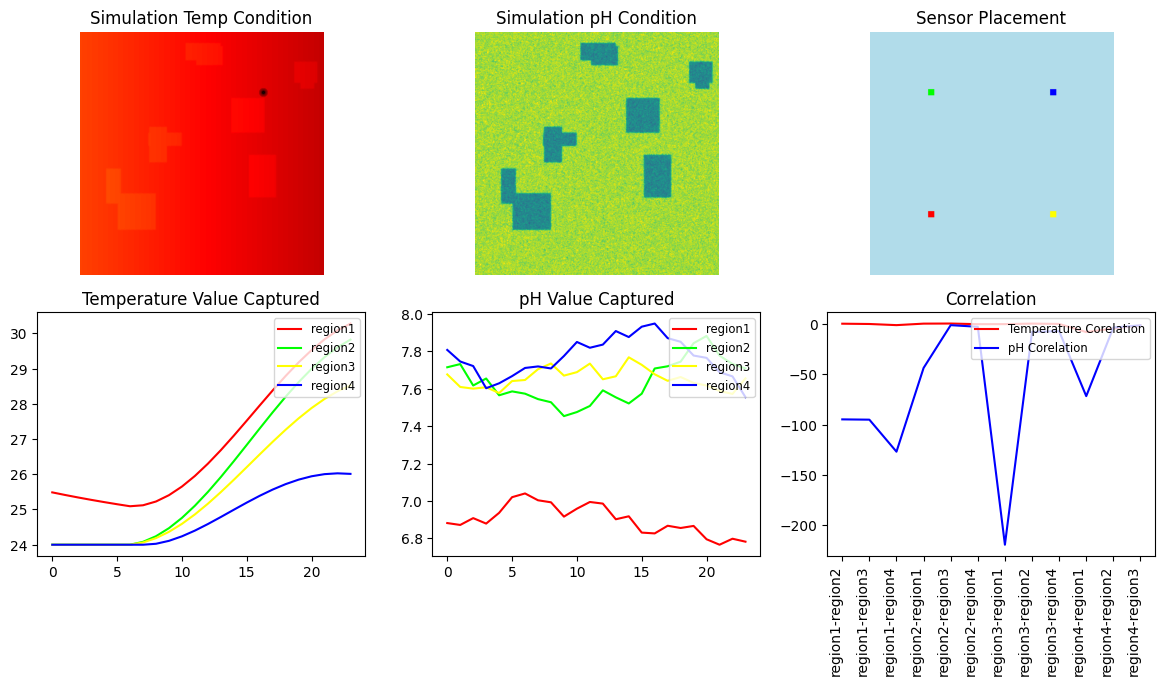

100%|██████████| 24/24 [03:10<00:00,  7.95s/it]
MovieWriter ffmpeg unavailable; using Pillow instead.
c:\Users\Alex\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Alex\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


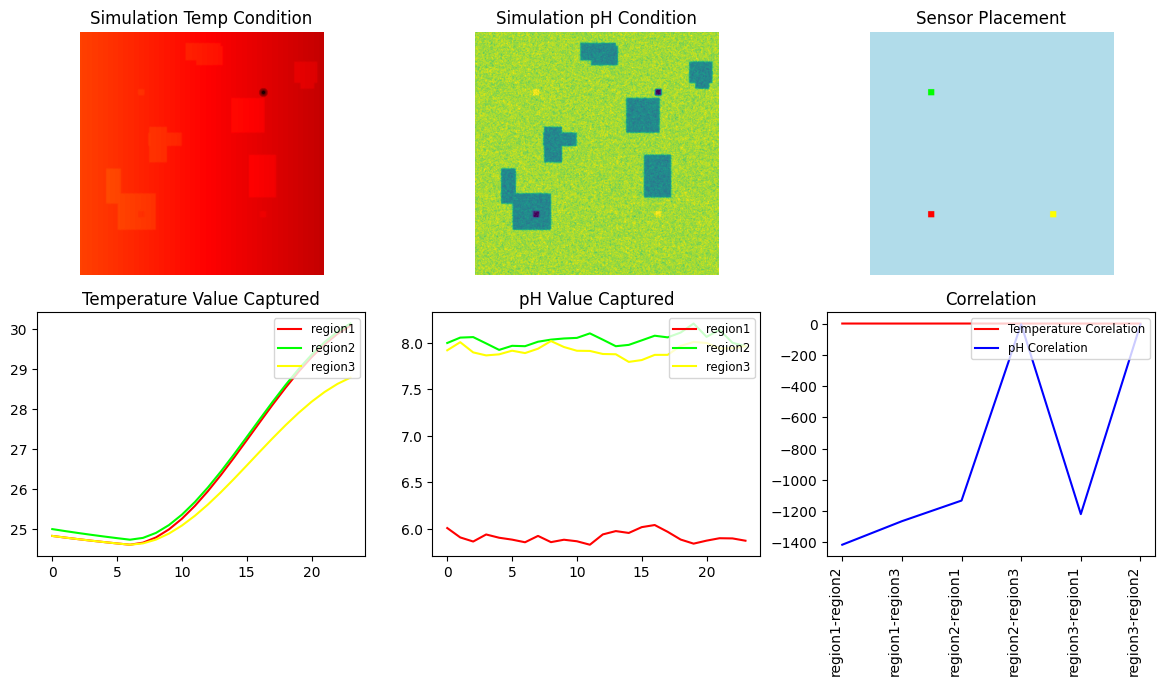

100%|██████████| 24/24 [03:10<00:00,  7.94s/it]
MovieWriter ffmpeg unavailable; using Pillow instead.
c:\Users\Alex\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Alex\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


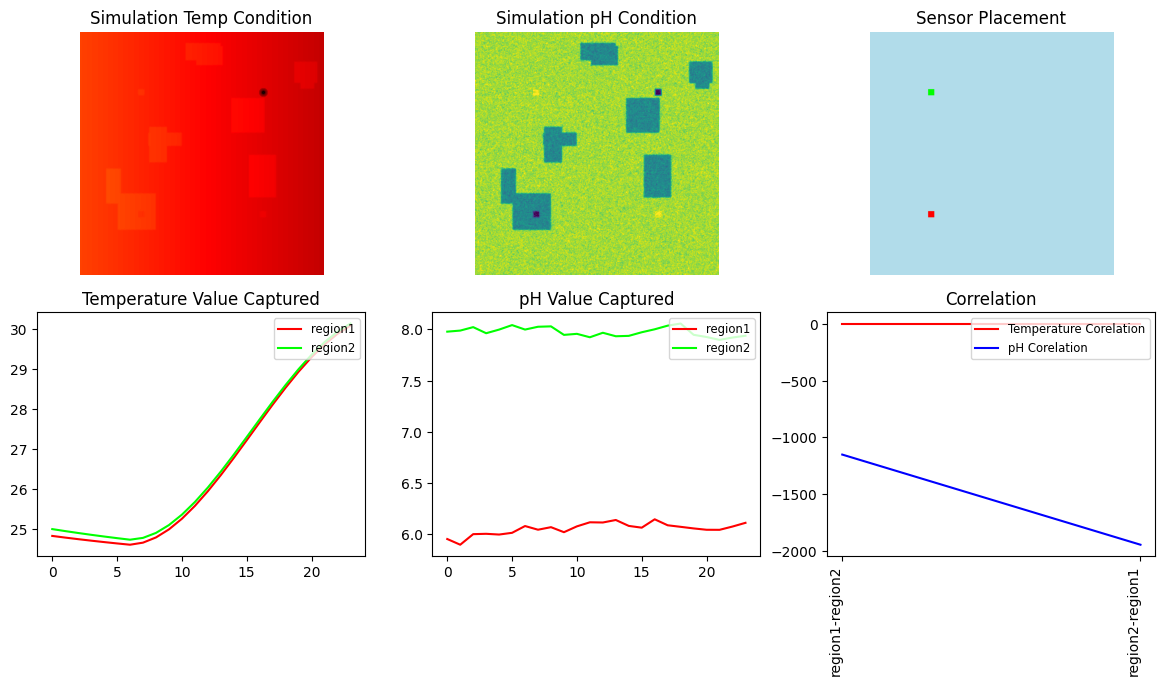

In [2]:
for sensor, num in zip(sensor_simulation, [4, 3, 2]):
    sim = SensorPlacementSimulation(sensor_agents=sensor, pond_args=pond_args)
    sim.initSensor()
    sim.simulate(num_iter=24)
    sim.Animate(saveMode=True, file_path=f'result/simulation-with{num}.gif')


In [3]:
for i in range(24):
    names, val_temps = sim.corelationTemp(i)
    for name, val in zip(names, val_temps):
        print(f"corelation{name}: {val}")

corelationregion1-region2: 0
corelationregion2-region1: 0
corelationregion1-region2: 0
corelationregion2-region1: 0
corelationregion1-region2: -63.51384083045345
corelationregion2-region1: -43.36525877453941
corelationregion1-region2: -23.224480968859538
corelationregion2-region1: -15.658834027365092
corelationregion1-region2: -11.943459315947624
corelationregion2-region1: -7.90103448497033
corelationregion1-region2: -7.108734795644384
corelationregion2-region1: -4.576262595933767
corelationregion1-region2: -4.5762590474676195
corelationregion2-region1: -2.834714728656936
corelationregion1-region2: -3.079795072890904
corelationregion2-region1: -1.8056175513126749
corelationregion1-region2: -3.1811323177736455
corelationregion2-region1: -1.772514846179333
corelationregion1-region2: -2.899135354331941
corelationregion2-region1: -1.8663617583923946
corelationregion1-region2: -0.6722249031947651
corelationregion2-region1: -0.6522262359626754
corelationregion1-region2: 0.4297996851015452
co

In [4]:
for i in range(24):
    names, val_ph = sim.corelationPH(i)
    for name, val in zip(names, val_ph):
        print(f"corelation{name}: {val}")

corelationregion1-region2: 0
corelationregion2-region1: 0
corelationregion1-region2: 0
corelationregion2-region1: 0
corelationregion1-region2: -5467.232042916282
corelationregion2-region1: -154742.16263039142
corelationregion1-region2: -2352.703484035349
corelationregion2-region1: -11773.707207432277
corelationregion1-region2: -2187.9650455874153
corelationregion2-region1: -8581.239894470713
corelationregion1-region2: -2438.688122837954
corelationregion2-region1: -10221.591230215723
corelationregion1-region2: -2469.522317047874
corelationregion2-region1: -5749.123434598409
corelationregion1-region2: -1492.017491945058
corelationregion2-region1: -6612.461188576728
corelationregion1-region2: -1512.2482550235727
corelationregion2-region1: -6533.824662135554
corelationregion1-region2: -1404.0694736122346
corelationregion2-region1: -6428.518789544658
corelationregion1-region2: -1539.5071246109328
corelationregion2-region1: -4566.074031835602
corelationregion1-region2: -1436.05208262332
core

## Water Qualitu Simulation

MovieWriter ffmpeg unavailable; using Pillow instead.


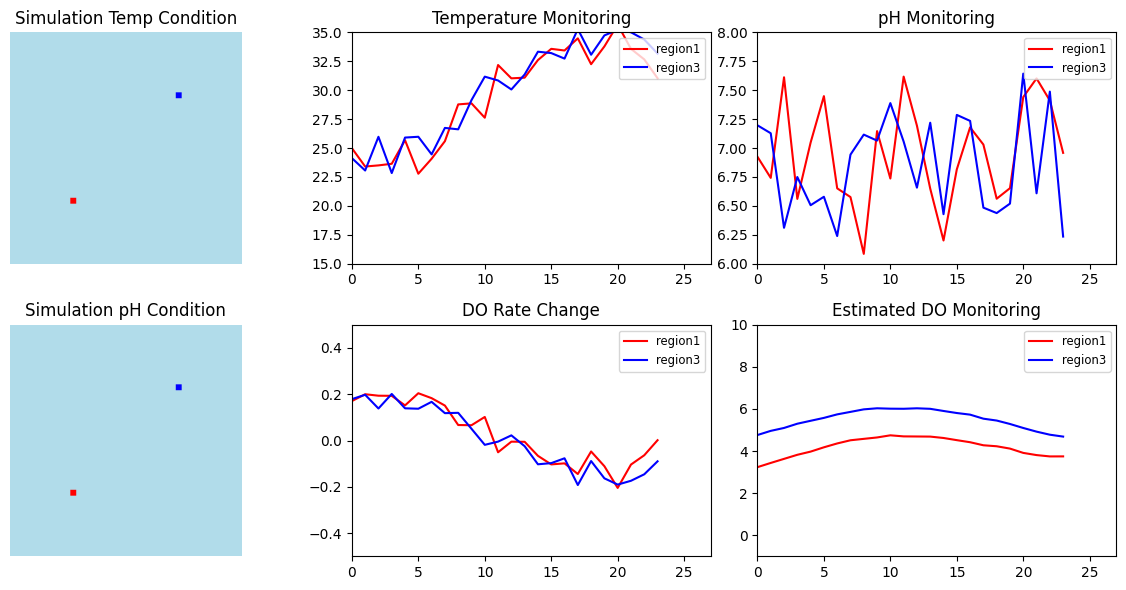

In [5]:
sim = WaterWualitySimulation()
sim.initSensor()
sim.simulate()

sim.AnimateSensors(
    ['region1', 'region3'],
    saveMode=True,
)